***Importing libraries***

In [1]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

***Upload dataset***

In [93]:
from google.colab import files
uploaded=files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [2]:
dataset = pd.read_csv('/content/StudentsPerformance.csv')
print(dataset)
ds=pd.DataFrame()

     gender race/ethnicity  ... reading score writing score
0    female        group B  ...            72            74
1    female        group C  ...            90            88
2    female        group B  ...            95            93
3      male        group A  ...            57            44
4      male        group C  ...            78            75
..      ...            ...  ...           ...           ...
995  female        group E  ...            99            95
996    male        group C  ...            55            55
997  female        group C  ...            71            65
998  female        group D  ...            78            77
999  female        group D  ...            86            86

[1000 rows x 8 columns]


In [3]:
dataset.shape

(1000, 8)

In [4]:
dataset.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


***Applying Descriptive statistics***

In [5]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
dataset.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [7]:
dataset.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

effect of lunch on performance

In [8]:
dataset[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

effect of test prep course on performance

In [9]:
dataset[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

***Visualising groups***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



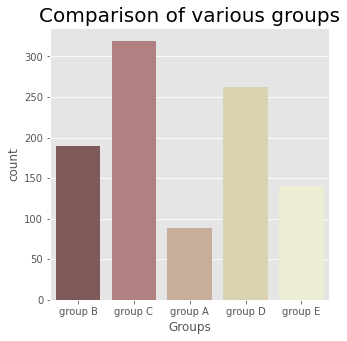

In [10]:
plt.rcParams['figure.figsize'] = (5, 5)
#Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
plt.style.use('ggplot')

sns.countplot(dataset['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 15, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

***Visualising parental education levels***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



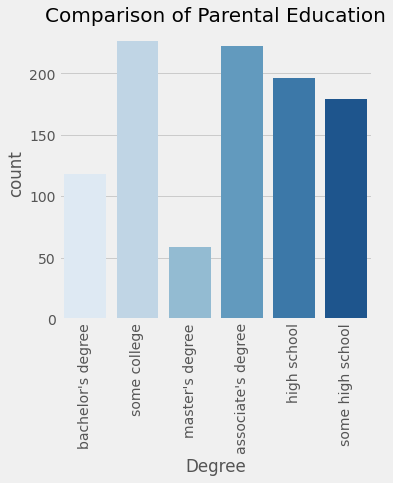

In [11]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('fivethirtyeight')

sns.countplot(dataset['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

***Vizualizing maths scores***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



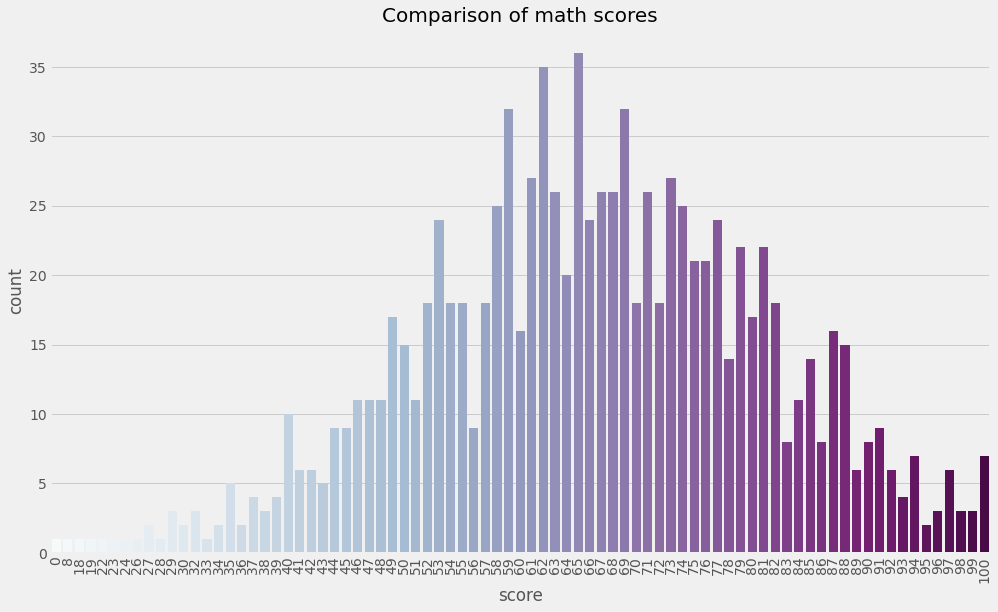

In [12]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(dataset['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

*Computing the total score for each student*

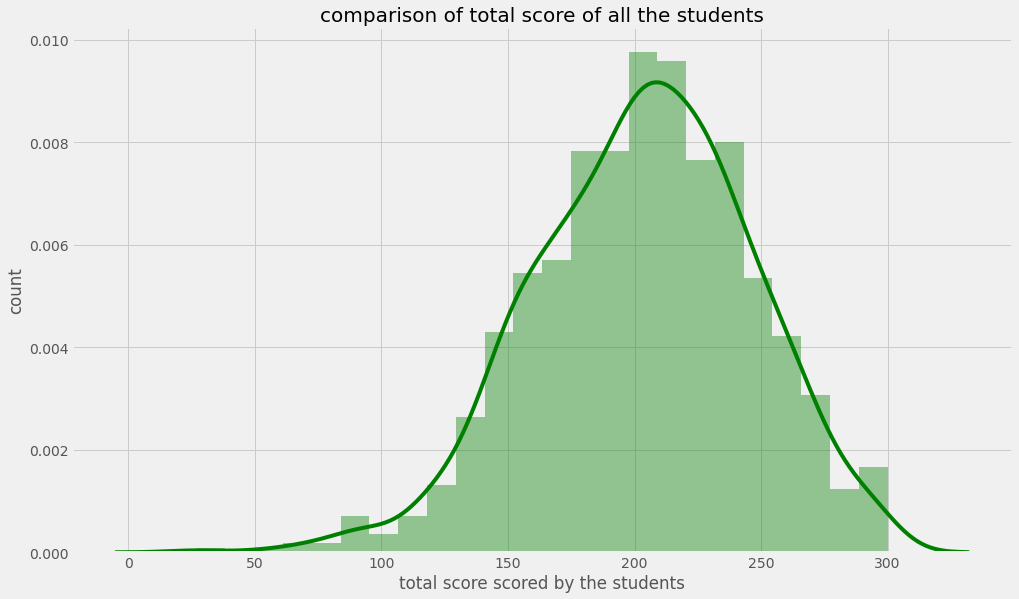

In [13]:
import warnings
warnings.filterwarnings('ignore')
#Use warnings.filterwarnings() to ignore deprecation warnings
#Leave category unset to ignore all warnings.

dataset['total_score'] = dataset['math score'] + dataset['reading score'] + dataset['writing score']

sns.distplot(dataset['total_score'], color = 'green')
#distplot function combines the matplotlib hist function (with automatic
#calculation of a good default bin size) with the seaborn kdeplot
#and rugplot functions. It can also fit scipy.stats
#distributions and plot the estimated PDF over the data.

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

*Computing percentage of each student*

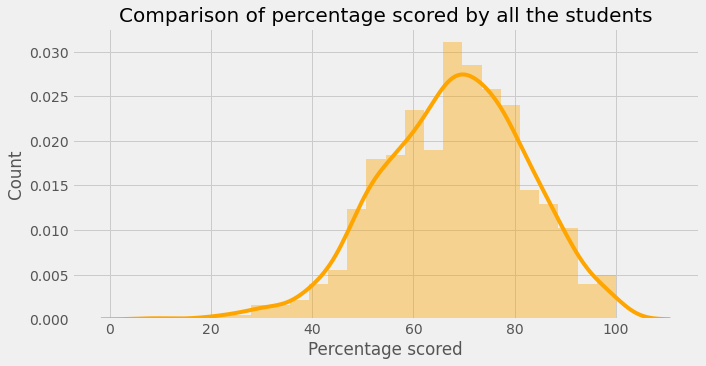

In [14]:
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

dataset['percentage'] = dataset['total_score']/3

for i in range(0, 1000):
    dataset['percentage'][i] = ceil(dataset['percentage'][i])

plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(dataset['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [16]:
data=dataset
def grade(percentage):
  if(percentage >= 90):
    return 'O'
  elif(percentage >= 80):
    return 'A'
  elif(percentage >= 70):
    return 'B'
  elif(percentage >= 60):
    return 'C'
  elif(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = dataset.apply(lambda x: grade(x['percentage']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

***LABEL ENCODING***

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [17]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()


# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(dataset['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(dataset['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = dataset['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = dataset['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = dataset['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = dataset['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = dataset['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(dataset['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(dataset['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(dataset['math score'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(dataset['reading score'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(dataset['writing score'])

data['grades'] = dataset['grades'].replace('O', 1)
data['grades'] = dataset['grades'].replace('A', 2)
data['grades'] = dataset['grades'].replace('B', 3)
data['grades'] = dataset['grades'].replace('C', 4)
data['grades'] = dataset['grades'].replace('D', 5)
data['grades'] = dataset['grades'].replace('E', 6)
# label encoding for status
#data['status'] = le.fit_transform(dataset['status'])
print(data['grades'])

0      3
1      2
2      1
3      5
4      3
      ..
995    1
996    5
997    4
998    3
999    2
Name: grades, Length: 1000, dtype: int64


In [19]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades,pass_math,pass_reading,pass_writing
0,0,2,1,1,1,72,72,74,218,73.0,3,52,44,50
1,0,3,4,1,0,69,90,88,247,83.0,2,49,62,64
2,0,2,3,1,1,90,95,93,278,93.0,1,70,67,69
3,1,1,0,0,1,47,57,44,148,50.0,5,27,29,20
4,1,3,4,1,1,76,78,75,229,77.0,3,56,50,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,282,94.0,1,68,70,71
996,1,3,2,0,1,62,55,55,172,58.0,5,42,27,31
997,0,3,2,0,0,59,71,65,195,65.0,4,39,43,41
998,0,4,4,1,0,68,78,77,223,75.0,3,48,50,53


In [20]:
x = data.iloc[:,:13]
y = data.iloc[:,13]

print(x.shape)
print(y.shape)

(1000, 13)
(1000,)


*Splitting testset and training set*

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.dtypes)
print(x_test.dtypes)

(750, 13)
(750,)
(250, 13)
(250,)
gender                           int64
race/ethnicity                   int64
parental level of education      int64
lunch                            int64
test preparation course          int64
math score                       int64
reading score                    int64
writing score                    int64
total_score                      int64
percentage                     float64
grades                           int64
pass_math                        int64
pass_reading                     int64
dtype: object
gender                           int64
race/ethnicity                   int64
parental level of education      int64
lunch                            int64
test preparation course          int64
math score                       int64
reading score                    int64
writing score                    int64
total_score                      int64
percentage                     float64
grades                           int64
pass_math       

In [37]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = pd.DataFrame(mm.fit_transform(x_train))
x_test = mm.fit_transform(x_test)

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In [38]:
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

[2.84611474e-01 2.24867026e-01 1.95181710e-01 1.19277674e-01
 1.08232095e-01 5.72033946e-02 5.77060950e-03 3.53571328e-03
 1.29594078e-03 1.50518242e-05 7.89014100e-06 1.42147391e-06
 6.47057960e-33]


# ***MODELLING***

In [67]:
#Finding errors
from sklearn import metrics
mae=[0,0,0,0,0,0]
mse=[0,0,0,0,0,0]
rmse=[0,0,0,0,0,0]
def print_error(x_test, y_test, model_name):
  prediction = model_name.predict(x_test)
  a=metrics.mean_absolute_error(y_test, prediction)
  b=metrics.mean_squared_error(y_test, prediction)
  c=np.sqrt(b)
  print('Mean Absolute Error:', a)
  print('Mean Squared Error:', b)
  print('Root Mean Squared Error:', c)
  return ([a,b,c])

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#y

(750, 2)
(750,)
(250, 2)
(250,)


***LOGISTIC REGRESSION***

In [69]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
mae[0],mse[0],rmse[0]=print_error(x_test,y_test, model)

Training Accuracy : 0.07733333333333334
Testing Accuracy : 0.056
Mean Absolute Error: 7.86
Mean Squared Error: 97.692
Root Mean Squared Error: 9.88392634533463


***SVR***

In [70]:
from sklearn.svm import SVR

model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
mae[1],mse[1],rmse[1]=print_error(x_test,y_test, model)

Training Accuracy : 0.7921488015301057
Testing Accuracy : 0.739389070649457
Mean Absolute Error: 5.8450763896563505
Mean Squared Error: 53.29673222515483
Root Mean Squared Error: 7.300461096749631


***DECISION TREE***

In [71]:
from sklearn.tree import DecisionTreeRegressor

# creating a model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
mae[2],mse[2],rmse[2]=print_error(x_test,y_test, model)

Training Accuracy : 1.0
Testing Accuracy : 0.422728512783256
Mean Absolute Error: 8.688
Mean Squared Error: 118.056
Root Mean Squared Error: 10.865357794384868


***RANDOM FOREST***

In [72]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
mae[3],mse[3],rmse[3]=print_error(x_test,y_test, model)

Training Accuracy : 1.0
Testing Accuracy : 0.032
Mean Absolute Error: 9.352
Mean Squared Error: 131.512
Root Mean Squared Error: 11.467868154107807


***LINEAR REGRESSION***

In [73]:
from sklearn import linear_model

model = linear_model.LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
mae[4],mse[4],rmse[4]=print_error(x_test,y_test, model)

Training Accuracy : 0.799961412239326
Testing Accuracy : 0.7588423812722014
Mean Absolute Error: 5.765552891932387
Mean Squared Error: 49.31839605277358
Root Mean Squared Error: 7.022705750120361


***ARTIFICIAL NEURAL NETWORK***

In [74]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=x_train.shape[1:]),
                                Dense(6,activation="relu"), 
                                Dense(1)
                                ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(x_train,y_train,epochs=100)
ann.summary()
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
mae[5],mse[5],rmse[5]=print_error(x_test,y_test,ann)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 2205.5977 - mean_squared_error: 2205.5977
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 2216.7527 - mean_squared_error: 2216.7527
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 2142.8021 - mean_squared_error: 2142.8021
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 2180.3193 - mean_squared_error: 2180.3193
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 2171.5866 - mean_squared_error: 2171.5866
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 2075.1366 - mean_squared_error: 2075.1366
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1997.5120 - mean_squared_error: 1997.5120
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 1923.2565 - mean_squared_error: 1923.2565
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 1892.19

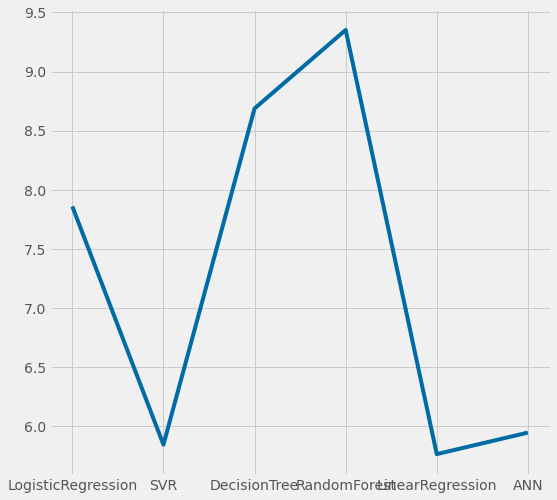

In [76]:
plt.plot(["LogisticRegression","SVR","DecisionTree","RandomForest","LinearRegression","ANN"],mae)
plt.show()

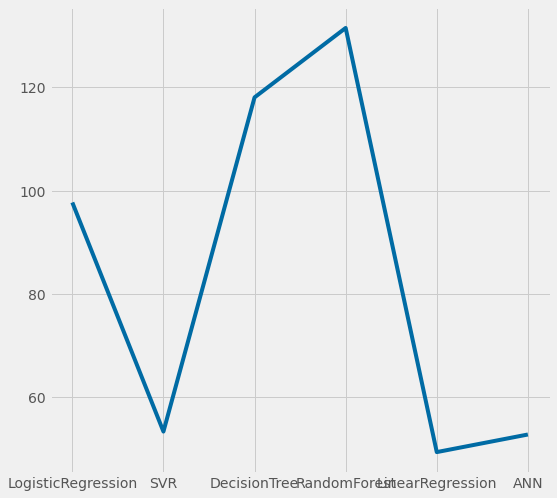

In [77]:
plt.plot(["LogisticRegression","SVR","DecisionTree","RandomForest","LinearRegression","ANN"],mse)
plt.show()

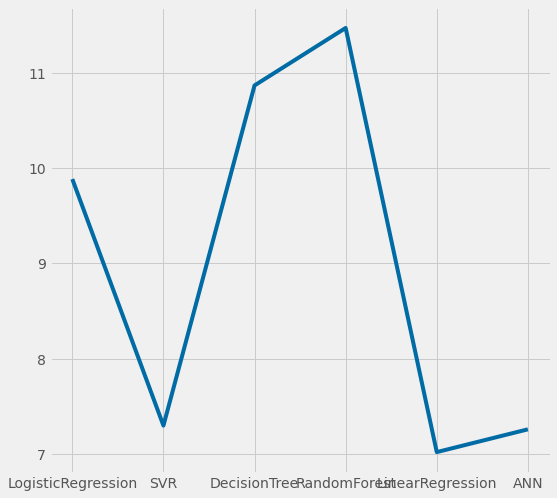

In [78]:
plt.plot(["LogisticRegression","SVR","DecisionTree","RandomForest","LinearRegression","ANN"],rmse)
plt.show()